# Final Project
### MODELADO DE DATOS CON REDES NEURONALES 
*Professor:* Michal Hemmerling \
*e-mail:* michal.hemmerling@udea.edu.co 

*Student:* Camilo José Torres Castaño \
*e-mail:* cjose.torres@udea.edu.co \
*C.c.* 1036401258

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 # For the circles

2022-04-04 19:06:27.523542: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/Products/root/lib
2022-04-04 19:06:27.523630: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(100, 3)

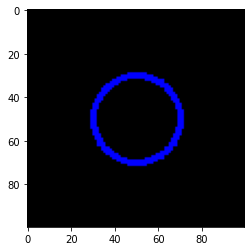

In [2]:
fig,ax=plt.subplots(1,1)

img = np.zeros([100, 100, 3])
color = (0, 0, 1)
cv2.circle(img, (50,50), 20, color,2)

ax.imshow(img[:,:])

img[0].shape

In [3]:
def draw_circle(x,y,r,c,th):
    cv2.circle(img, center = (x,y), radius = r, color = c, thickness=th)

all_circle=[]
all_area=[]

ncircles=1000
for i in range(ncircles):   
    img = np.zeros([150, 150,3])
    x,y=np.random.randint(10,90,2)
    r=np.random.randint(10,30)
    c= (0, 0, 1)
    th=2    
    draw_circle(x,y,r,c,th) 
    
    #img_flat=img.reshape(1,img.size)
    all_circle.append(img)
    all_area.append(np.pi*r**2)
    
all_circle_array=np.array(all_circle)    
all_area_array=np.array(all_area)

print(all_circle_array.shape)
print(all_area_array.shape)

(1000, 150, 150, 3)
(1000,)


Text(0.5, 1.0, '907.9202768874502')

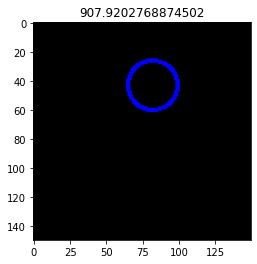

In [4]:
fig,ax=plt.subplots(1,1)
idx=np.random.randint(0,ncircles)
ax.imshow(all_circle_array[idx])
ax.set_title(str(all_area_array[idx]))

In [5]:
# Divide my data into X data and y data
X_data = all_circle_array
y_data = all_area_array

print("X_data shape: ",X_data.shape)
print("y_data shape: ",y_data.shape)

X_data[0].shape

X_data shape:  (1000, 150, 150, 3)
y_data shape:  (1000,)


(150, 150, 3)

In [6]:
# Split my data into test and train samples
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

In [7]:
# input_shape 

print("Shape of a single sample: ", X_train[0].shape)

Shape of a single sample:  (150, 150, 3)


In [8]:
# Import a sequential model
from tensorflow.keras.models import Sequential

# Import the models to solve the problems
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout,Conv2D, MaxPooling2D

# Import regularizers
from tensorflow.keras import regularizers

# Import regularizers
from tensorflow.keras import optimizers


In [15]:
# Create a function with the Sequential model
def get_model(input_shape = X_train[0].shape, dr = 0.2):
    model = Sequential([
                        InputLayer(input_shape = input_shape, name='input'),
        
                        Conv2D(filters=64,kernel_size=1, input_shape=input_shape, activation='relu'),
                        Conv2D(filters=64,kernel_size=1, input_shape=input_shape, activation='relu'),
        
                        MaxPooling2D((2, 2), padding='same'),
                        Flatten(),
                        Dense(units=1024, activation='relu'),
                        Dropout(dr),
                        Dense(units=1, activation='linear')
                        
                        ])
    return model

In [ ]:
# Intance a Sequen|tial model
model = get_model(X_train[0].shape, 0.2)

2022-04-04 19:07:55.601839: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1474560000 exceeds 10% of free system memory.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 1)       4         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 1)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5625)              0         
                                                                 
 dense (Dense)               (None, 1024)              5761024   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                        

In [12]:
def compile_model(model, optimizer, loss):
    model.compile(optimizer=optimizer,
                  loss=loss, # For clasification problem with digits, not with one-hot encoding
                  metrics=['accuracy']
                 )

In [13]:
compile_model(model, optimizers.RMSprop(learning_rate=0.0001), 'mean_squared_error')

In [14]:
epochs = 20
myhistory = model.fit(X_train, y_train, epochs=epochs, batch_size = 32, validation_split=0.15)

Epoch 1/20
22/22 [==============================] - 2s 68ms/step - loss: 2230845.5000 - accuracy: 0.0000e+00 - val_loss: 2149820.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
22/22 [==============================] - 1s 64ms/step - loss: 2224486.7500 - accuracy: 0.0000e+00 - val_loss: 2140589.7500 - val_accuracy: 0.0000e+00
Epoch 3/20
22/22 [==============================] - 1s 61ms/step - loss: 2212573.2500 - accuracy: 0.0000e+00 - val_loss: 2126265.2500 - val_accuracy: 0.0000e+00
Epoch 4/20
22/22 [==============================] - 1s 60ms/step - loss: 2194886.5000 - accuracy: 0.0000e+00 - val_loss: 2106119.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
22/22 [==============================] - 1s 59ms/step - loss: 2171453.2500 - accuracy: 0.0000e+00 - val_loss: 2080315.2500 - val_accuracy: 0.0000e+00
Epoch 6/20
22/22 [==============================] - 1s 63ms/step - loss: 2141884.7500 - accuracy: 0.0000e+00 - val_loss: 2048677.5000 - val_accuracy: 0.0000e+00
Epoch 7/20
22/22 [================

KeyboardInterrupt: 